In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv(r'C:\Users\HP\Downloads\gld_price_data (2).csv')

In [3]:
#data.set_index("Date", inplace = True)


In [4]:
data.drop("SPX",axis=1,inplace = True)

In [5]:
data.drop("USO",axis=1,inplace = True)

In [6]:
data.drop("SLV",axis=1,inplace = True)

In [7]:
data.drop("EUR/USD",axis=1,inplace = True)

In [8]:
data

,Date,GLD
0,1/2/2008,84.860001
1,1/3/2008,85.570000
2,1/4/2008,85.129997
3,1/7/2008,84.769997
4,1/8/2008,86.779999
...,...,...
2285,5/8/2018,124.589996
2286,5/9/2018,124.330002
2287,5/10/2018,125.180000
2288,5/14/2018,124.489998


<Axes: >

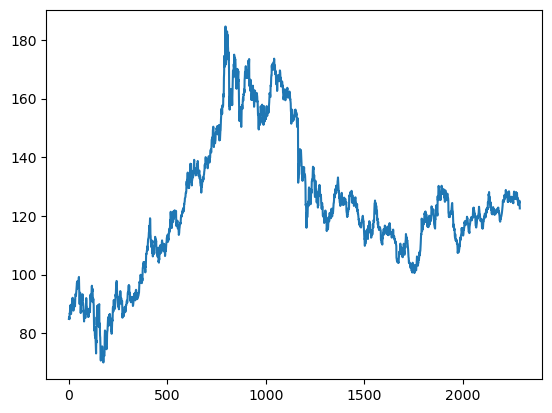

In [9]:
training_data=data["GLD"].astype(float)
plot_data=training_data
plot_data.plot.line() 
     

In [10]:
training_data=np.array(data['GLD'])
training_data=training_data.reshape(-1,1)

In [11]:
scaler=StandardScaler()
scaler=scaler.fit(training_data)
training_data_scaled=scaler.transform(training_data)


In [12]:
trainX=[]
trainY=[]
n_past=3
n_fut=1

for i in range(n_past,len(training_data_scaled)-n_fut+1):
    trainX.append(training_data_scaled[i-n_past:i,0:training_data_scaled.shape[1]])
    trainY.append(training_data_scaled[i+n_fut-1:i+n_fut,0])

In [13]:
trainX,trainY=np.array(trainX),np.array(trainY)

In [14]:
print('trainX shape=={}'.format(trainX.shape))
print('trainY shape=={}'.format(trainY.shape))
     

trainX shape==(2287, 3, 1)
trainY shape==(2287, 1)


In [15]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 3, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(trainX,trainY,epochs=30,batch_size=5,validation_split=0.2,verbose=1)

     

Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6663 - val_loss: 0.0125
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1170 - val_loss: 0.0213
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0925 - val_loss: 0.0100
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0877 - val_loss: 0.0066
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0849 - val_loss: 0.0043
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0715 - val_loss: 0.0037
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0676 - val_loss: 0.0037
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0635 - val_loss: 0.0071
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0658 - val_loss: 0.0039
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0658 - val_loss: 0.0039
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0656 - val_loss: 0.0061
Epoch 12/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

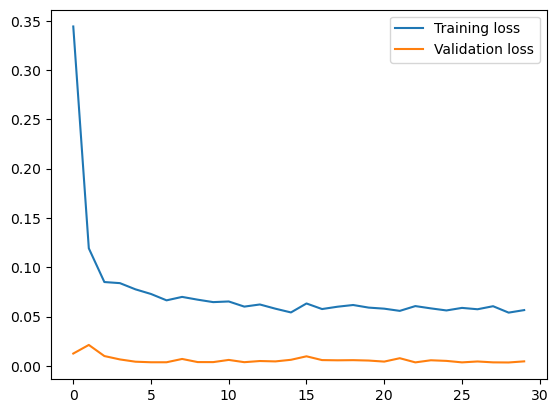

In [18]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()


In [19]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())


In [20]:
print(data.columns)

Index(['Date', 'GLD'], dtype='object')


In [21]:
train_dates=pd.to_datetime(data['Date'])

In [91]:
n_past=1
n_days_for_prediction=2280
predict_period_dates=pd.date_range(list(train_dates)[-n_past],periods=n_days_for_prediction,freq=us_bd).tolist()
prediction=model.predict(trainX[-n_days_for_prediction:])

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step


In [92]:
prediction_copies=np.repeat(prediction,training_data.shape[1],axis=-1)
y_pred_future=scaler.inverse_transform(prediction_copies)[:,0]
forecast_dates=[]
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast=pd.DataFrame({'Date':np.array(forecast_dates),'GLD':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: ylabel='GLD'>

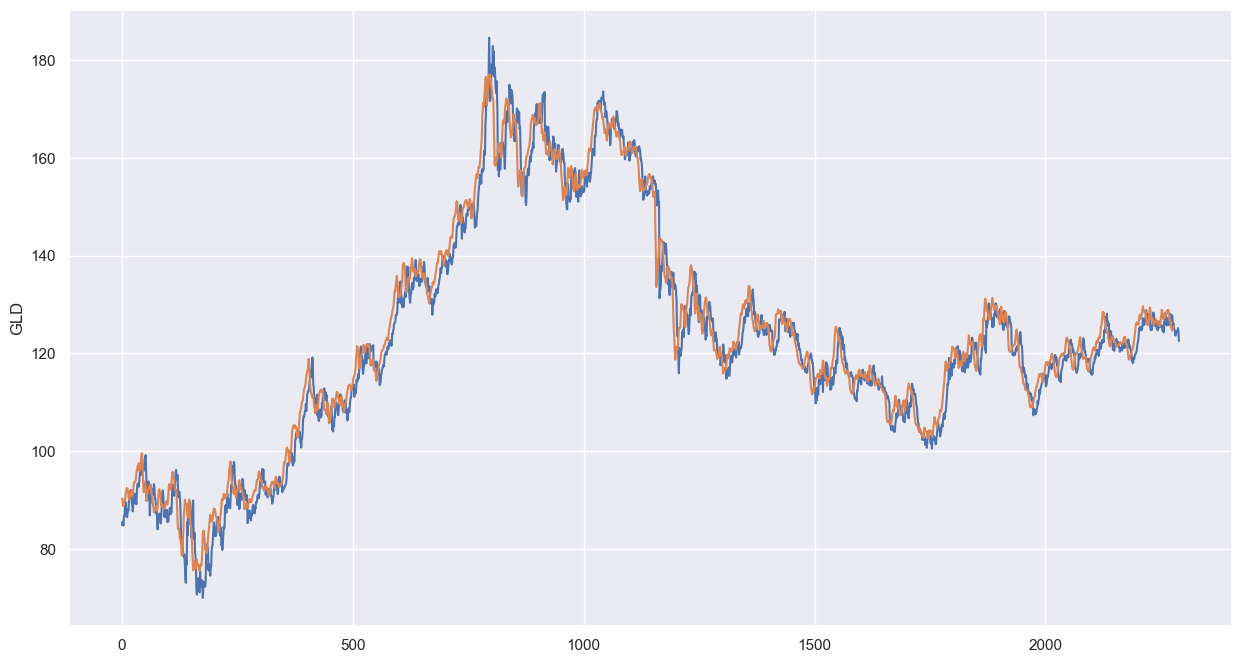

In [93]:
original=data[['Date','GLD']]
original['Date']=pd.to_datetime(original['Date'])
original=original.loc[original['Date'] >= '2008-1-1']

sns.set(rc={'figure.figsize':(15,8)})
#sns.lineplot(original['Date'],original['GLD'])
#sns.lineplot(df_forecast['Date'],df_forecast['GLD'])
#sns.lineplot(data=original, x='Date', y='GLD', label='Original')
#sns.lineplot(data=df_forecast, x='Date', y='GLD', label='Forecast')
sns.lineplot(original['GLD'])
sns.lineplot(df_forecast['GLD'])



In [108]:
""""import numpy as np
from sklearn.metrics import mean_squared_error


merged = pd.merge(original, df_forecast, on='Date', suffixes=('_orig', '_forecast'))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged['GLD_orig'], merged['GLD_forecast']))

print(f'RMSE: {rmse}')"""

'"import numpy as np\nfrom sklearn.metrics import mean_squared_error\n\n\nmerged = pd.merge(original, df_forecast, on=\'Date\', suffixes=(\'_orig\', \'_forecast\'))\n\n# Calculate RMSE\nrmse = np.sqrt(mean_squared_error(merged[\'GLD_orig\'], merged[\'GLD_forecast\']))\n\nprint(f\'RMSE: {rmse}\')'

In [112]:
"""from sklearn.metrics import r2_score

r2 = r2_score(original['GLD'],df_forecast['GLD'])
#print(r2)"""

"from sklearn.metrics import r2_score\n\nr2 = r2_score(original['GLD'],df_forecast['GLD'])\n#print(r2)"

In [110]:
#rmse=np.sqrt(mean_squared_error(original['GLD'],df_forecast['GLD']))